# **Financials Dataset Analysis**
*****

### **Importing Necessary libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

### **Importing the dataset**

In [10]:
df = pd.read_csv("/Users/akhilsamvarghese/Desktop/Projects/CQAI/Data-Visualization/finance-dataset/Financials.csv")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [11]:
df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [20]:
df.columns
#Displaying the colunms in the dataset

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [47]:
df.columns = df.columns.str.strip()
# .strip() is a string method that removes leading and trailing whitespace from a string.
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

*****

# **Pre-processing the Dataset** 
*****

### **Conveting paranthesis in the dataset to -ve numbers**

In [24]:
def convert_parentheses(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1].replace(',', ''))
        else:
            return float(val)
    else:
        return val


In [25]:
num_columns = df.shape[1]#Here, '1' is passed to count the number of columns
print(f'Number of columns: {num_columns}')

Number of columns: 16


In [27]:
print(df.duplicated().sum())

0


### **Removing symbols like $ and -**

In [30]:
# Check for columns that contain '$' symbol
dollar_columns = df.columns[df.apply(lambda col: col.astype(str).str.contains('\$', regex=True).any())]
print("Columns with $ symbol:", dollar_columns)

# Check for columns that contain '-' symbol
dash_columns = df.columns[df.apply(lambda col: col.astype(str).str.contains('-', regex=True).any())]
print("Columns with - symbol:", dash_columns)

Columns with $ symbol: Index(['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales',
       'Discounts', 'Sales', 'COGS', 'Profit'],
      dtype='object')
Columns with - symbol: Index(['Discounts', 'Profit'], dtype='object')


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/w2/g69wp0m94033x48hfps56f4m0000gn/T/ipykernel_7124/2969063940.py:3: SyntaxWarning: invalid escape sequence '\$'
  dollar_columns = df.columns[df.apply(lambda col: col.astype(str).str.contains('\$', regex=True).any())]


In [32]:
columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales',
       'Discounts', 'Sales', 'COGS', 'Profit']

In [38]:
columns_to_clean

['Units Sold',
 'Manufacturing Price',
 'Sale Price',
 'Gross Sales',
 'Discounts',
 'Sales',
 'COGS',
 'Profit']

In [39]:
# Remove '$', '-' and ',' from the columns, convert values in parentheses to negative numbers, convert empty strings to NaN, and then convert to float
for col in columns_to_clean:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the cleaned data
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


In [55]:
print(df.dtypes)

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
Revenue                       float64
dtype: object


### **Exporting the cleaned data-frame into a csv file**

In [57]:
df.to_csv("cleaned_dataset.csv", index='False')

*****

# **Data Visualization**
*****

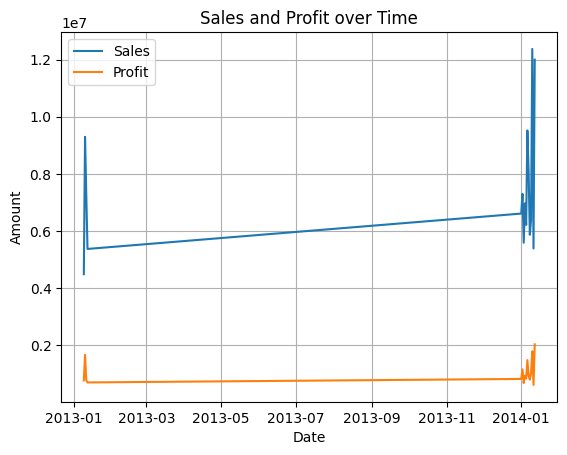

In [54]:
# Group data by Date
grouped_df = df.groupby('Date').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit over time
plt.plot(grouped_df.index, grouped_df['Sales'], label='Sales')
plt.plot(grouped_df.index, grouped_df['Profit'], label='Profit')
plt.title('Sales and Profit over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

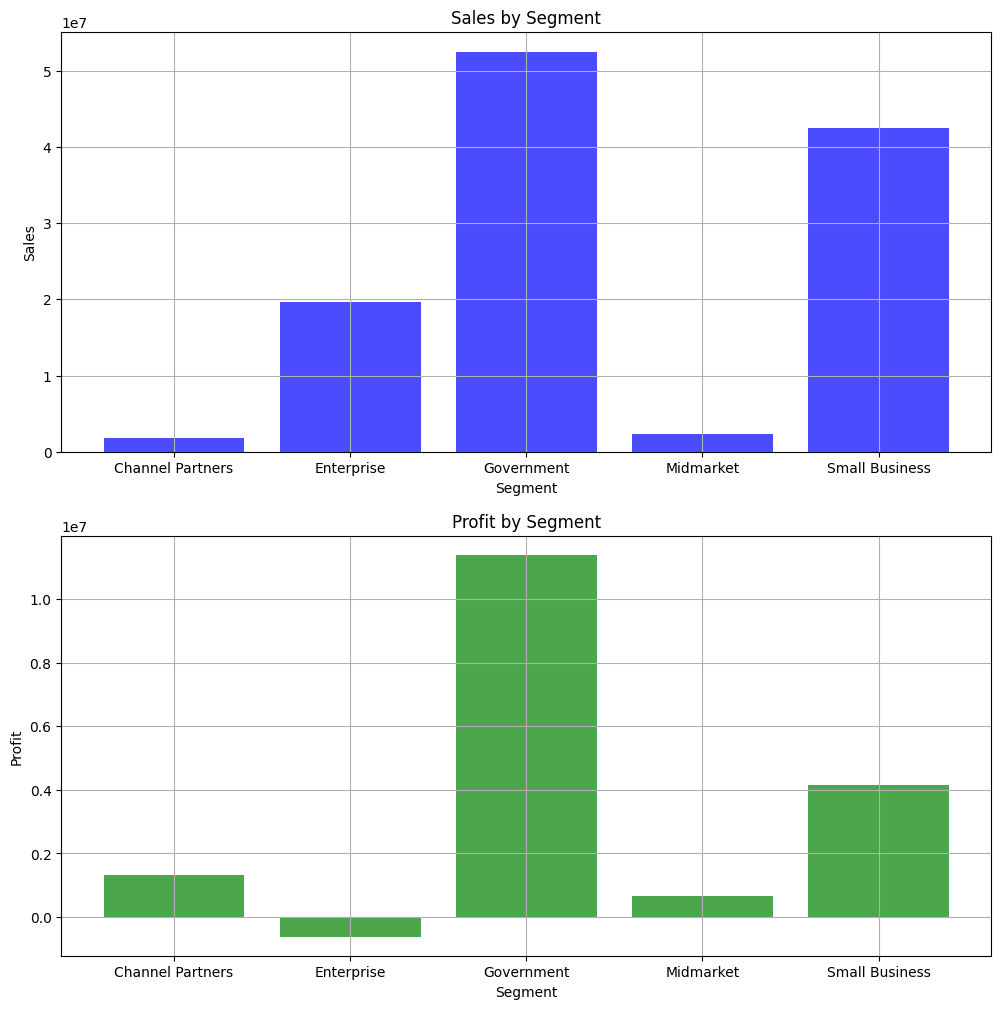

In [70]:
#Group data by segment
grouped_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit by Segment
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].bar(grouped_segment.index, grouped_segment['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Sales by Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Sales')
ax[0].grid()

ax[1].bar(grouped_segment.index, grouped_segment['Profit'], color='green', alpha=0.7)
ax[1].set_title('Profit by Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Profit')
ax[1].grid()